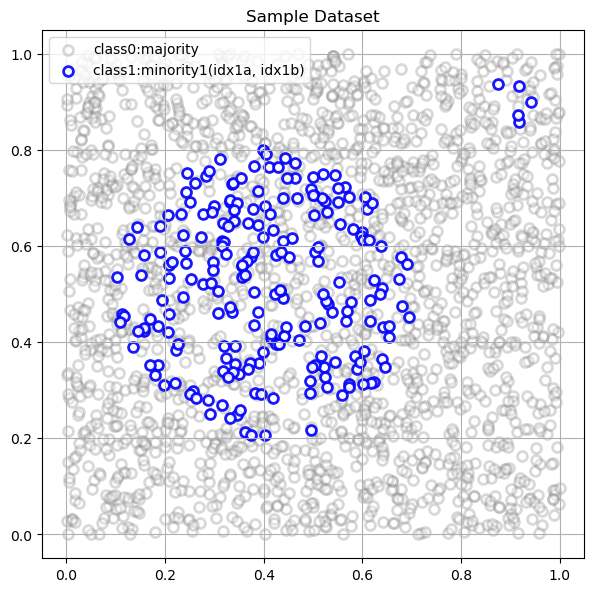

In [34]:
#【前処理の学習-37】データを学ぶ ～生成～⑤ - BorderlineSMOTE -
# Ver.Binary Classification(2separation in a Class)
# ～二値分類 (1クラス2分割)版～
# -------------
# 参考・参照元
# This code is created by based below infomation.
# Qiita「実装編：オーバーサンプリング手法比較 (SMOTE, ADASYN, Borderline-SMOTE, Safe-level SMOTE)」
# @eigs 氏
# https://qiita.com/eigs/items/9ed36b5fc2913110e940
# 「検証用データ作成コード」を参考にして作成
# -------------

# ライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 初期データセットのサンプル数を指定
Ndata = 3000;

# 二列構成の配列を作成し乱数を代入（データセットの素を作成）
data  = np.random.rand(Ndata, 2)

# 生成した乱数の配列からを一列ずつ抽出
x = data[:, 0]    # X軸
y = data[:, 1]    # Y軸

# 少数派クラス生成
# ブールインデックス参照を利用しTrue/Falseのリストを作成

# 少数派クラスのサンプル描画位置(x軸, y軸), 描画範囲(半径)
# 少数派クラスの集合(大)　x軸：0.4, y軸：0.5, 範囲(半径)：0.3
idx1a = np.power((x-0.4), 2) + np.power((y-0.5), 2) < np.power(0.3, 2)

# 少数派クラスの集合(小)　x軸：0.9, 0.9, 範囲(半径)：0.05
idx1b = np.power((x-0.9), 2) + np.power((y-0.9), 2) < np.power(0.05, 2)

# アンダーサンプリングレート：4
undersampleRate = 4

# アンダーサンプリングを行ない、少数派クラスのデータセットを作成
data1  = data[idx1a|idx1b, :]            # True/FalseリストでTrueのデータのみ抽出
data1  = data1[0:-1:undersampleRate, :]  # 抽出データからアンダーサンプリングレート分除外

# オリジナルデータセットから少数派クラスのレコードを削除
# ブールインデックス参照で作成したTrue/Falseリストを使用
data = np.delete(data, np.where(data[idx1a|idx1b, :]), axis=0)

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.3, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('Sample Dataset')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()


In [35]:
# データの結合
# ライブラリ
import numpy as np
import numpy.matlib

# データセット(多数派・少数派)配列の行方向結合
dataset = np.vstack((data, data1))

# 目的変数の作成
label0 = np.matlib.repmat('0', len(data),  1)  # class0
label1 = np.matlib.repmat('1', len(data1), 1)  # class1

# 目的変数の行方向結合
labels = np.vstack((label0, label1))

# データセット(x, y)と目的変数の列方向結合
dataset = np.hstack((dataset, labels))


In [36]:
# 目的変数の割合確認
from collections import Counter
print(sorted(Counter(dataset[:, 2]).items()))

[('0', 2123), ('1', 219)]


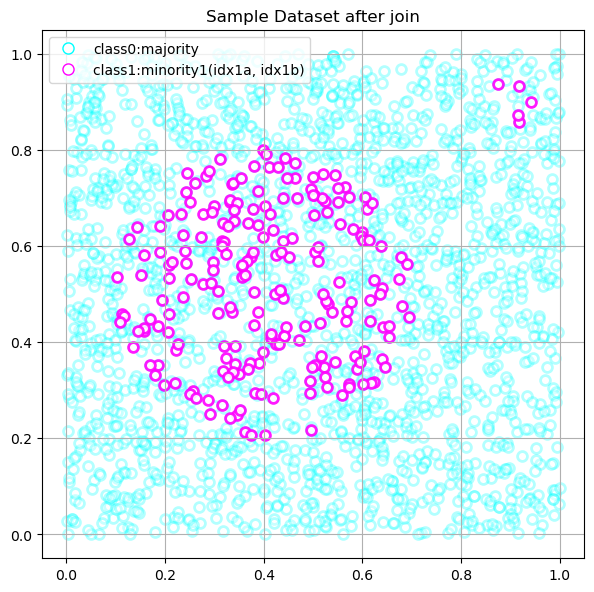

In [37]:
# データセット結合後の正常性確認

# ライブラリ
from matplotlib.lines import Line2D  # 凡例マーカー設定

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(目的変数の値ごとにプロットを色分け)
for element in dataset:

    # 多数派クラス
    if element[2] == '0':
        plt.scatter(float(element[0]), float(element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='cyan',  alpha=0.3)
        
    # 少数派クラス(idx1a(集合大), idx1b(集合小))
    elif element[2] == '1':
        plt.scatter(float(element[0]), float(element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='magenta',  alpha=0.9)
      
    # 例外処理
    else:
        pass
    
# 凡例マーカー設定
legend_elements = [Line2D([],[], marker='o', markersize=8, linewidth=2.0, mfc='white', mec='cyan',    lw=0.0, label='class0:majority'), \
                   Line2D([],[], marker='o', markersize=8, linewidth=2.0, mfc='white', mec='magenta', lw=0.0, label='class1:minority1(idx1a, idx1b)')]

# プロット図タイトル
plt.title('Sample Dataset after join')

# 凡例表示
plt.legend(handles=legend_elements, loc='upper left')

# グリッド線表示
plt.grid()

plt.show()


In [38]:
# 目的変数の割合確認
# データセット結合後にデータが変わっていないことを確認
from collections import Counter
print(sorted(Counter(dataset[:, 2]).items()))

[('0', 2123), ('1', 219)]


In [39]:
# データセット各要素の型確認
print('type(dataset): ', type(dataset))
print()
print('dataset[:, 0].dtype: ', dataset[:, 0].dtype) # little-endian Unicode32bit string
print('dataset[:, 1].dtype; ', dataset[:, 1].dtype) # little-endian Unicode32bit string
print('dataset[:, 2].dtype: ', dataset[:, 2].dtype) # little-endian Unicode32bit string
print()
print('dataset.shape: ', dataset.shape)

# 各要素がlittle-endian Unicode32bit stringのため
# 次の工程でfloat/intへ型キャストする。

type(dataset):  <class 'numpy.ndarray'>

dataset[:, 0].dtype:  <U32
dataset[:, 1].dtype;  <U32
dataset[:, 2].dtype:  <U32

dataset.shape:  (2342, 3)


In [40]:
# データセットの各要素を適宜「型変換(キャスト)」する。
# ただしastype関数は、新規ndarrayを生成して返すため新しい配列を作成する。
X = dataset[:, 0:2].astype(np.float64) # XY軸
y = dataset[:, 2].astype(np.int64)     # 目的変数

# yは目的変数のみの1次配列だが、y.shapeで確認すると
# y(Row_max, (empty))と定義されているため
# 明示的に一次配列y(Row_max, 1)の形に再定義する。
y = np.reshape(y, (-1, 1))


## sampling_strategy='not majority' 版

In [41]:
# BorderlineSMOTE(Ver.not majority)

# ライブラリ
from imblearn.over_sampling import BorderlineSMOTE

sm = BorderlineSMOTE(sampling_strategy='not majority',\
                     random_state=None,\
                     k_neighbors=5,\
                     n_jobs=None,\
                     m_neighbors=10,\
                     kind='borderline-1')

X_res, y_res = sm.fit_resample(X, y)


In [42]:
# 目的変数の割合確認
from collections import Counter
print(sorted(Counter(y_res).items()))

[(0, 2123), (1, 2123)]


In [43]:
# 明示的に一次配列y_res(Row_max, 1)の形に再定義する。
y_res = np.reshape(y_res, (-1, 1))

# 目的変数の値を条件式に利用してプロット図を
# 描画するため説明変数(X軸,Y軸)と目的変数を結合
resample_dataset = np.hstack((X_res, y_res))

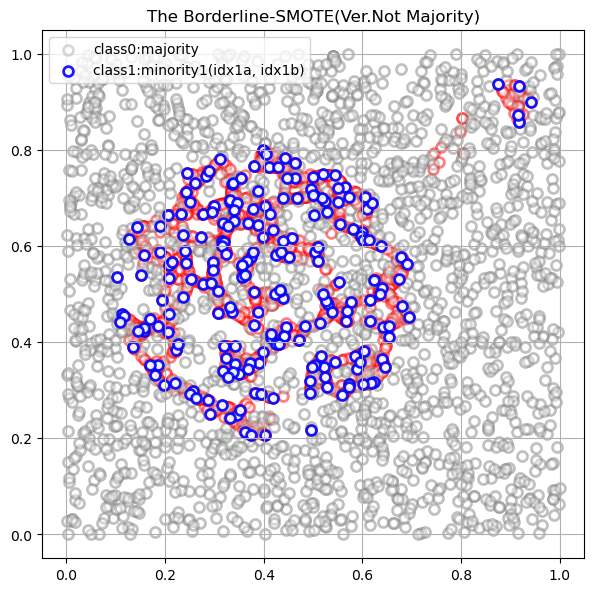

In [44]:
# オーバーサンプリング後(Not_majority版)

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.3)
        
    # 少数派クラス(idx1a(集合大), idx1b(集合小))
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
             
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.3, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE(Ver.Not Majority)')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()

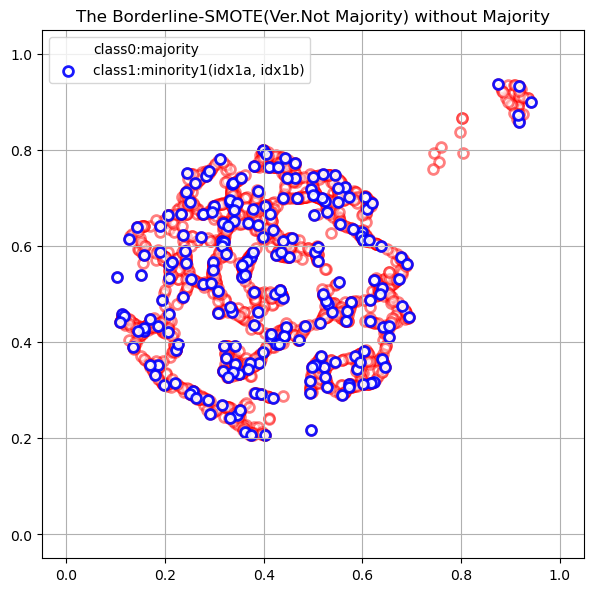

In [45]:
# オーバーサンプリング後(Not majority & 多数派クラス非表示版)

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.0)
        
    # 少数派クラス1(idx1a, idx1b)
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
             
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.0, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE(Ver.Not Majority) without Majority')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()

## sampling_strategy='minority' 版

In [46]:
# BorderlineSMOTE(Ver.minority)

sm_minority = BorderlineSMOTE(sampling_strategy='minority',\
                              random_state=None,\
                              k_neighbors=5,\
                              n_jobs=None,\
                              m_neighbors=10,\
                              kind='borderline-1')

X_res, y_res = sm_minority.fit_resample(X, y)


In [47]:
# 目的変数の割合確認
from collections import Counter
print(sorted(Counter(y_res).items()))

[(0, 2123), (1, 2123)]


In [48]:
# 明示的に一次配列y_res(Row_max, 1)の形に再定義する。
y_res = np.reshape(y_res, (-1, 1))

# 目的変数の値を条件式に利用してプロット図を
# 描画するため説明変数(X軸,Y軸)と目的変数を結合
resample_dataset = np.hstack((X_res, y_res))


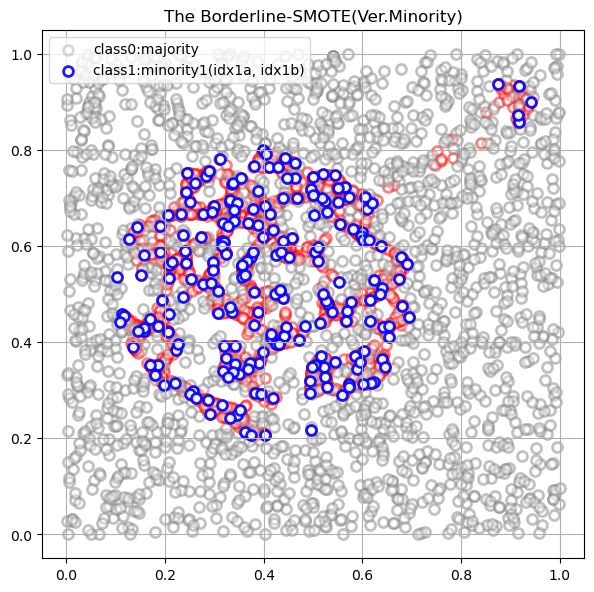

In [49]:
# オーバーサンプリング後(minority版)

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.3)
        
    # 少数派クラス(idx1a(集合大), idx1b(集合小))
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
             
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.3, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE(Ver.Minority)')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()

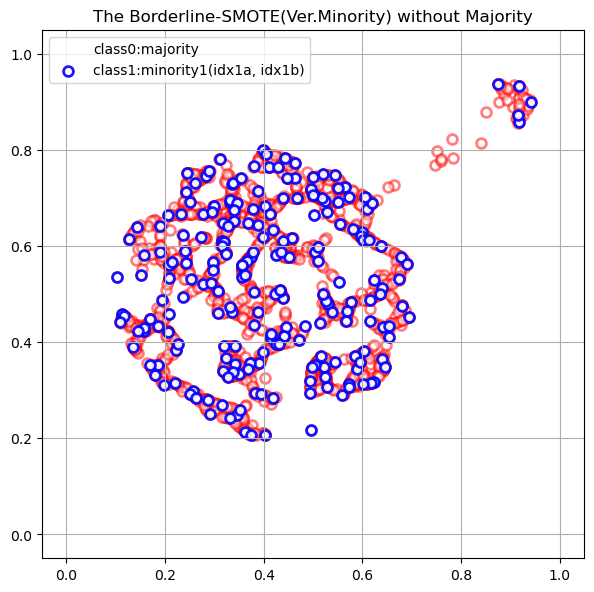

In [50]:
# オーバーサンプリング後(minority & 多数派クラス非表示版)

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.0)
        
    # 少数派クラス(idx1a(集合大), idx1b(集合小))
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
        
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.0, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE(Ver.Minority) without Majority')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()

## sampling_strategy='auto' 版

In [51]:
# BorderlineSMOTE(Ver.auto)

sm_auto = BorderlineSMOTE(sampling_strategy='auto',\
                          random_state=None,\
                          k_neighbors=5,\
                          n_jobs=None,\
                          m_neighbors=10,\
                          kind='borderline-1')

X_res, y_res = sm_auto.fit_resample(X, y)


In [52]:
# 目的変数の割合確認
from collections import Counter
print(sorted(Counter(y_res).items()))

[(0, 2123), (1, 2123)]


In [53]:
# 明示的に一次配列y_res(Row_max, 1)の形に再定義する。
y_res = np.reshape(y_res, (-1, 1))

# 目的変数の値を条件式に利用してプロット図を
# 描画するため説明変数(X軸,Y軸)と目的変数を結合
resample_dataset = np.hstack((X_res, y_res))


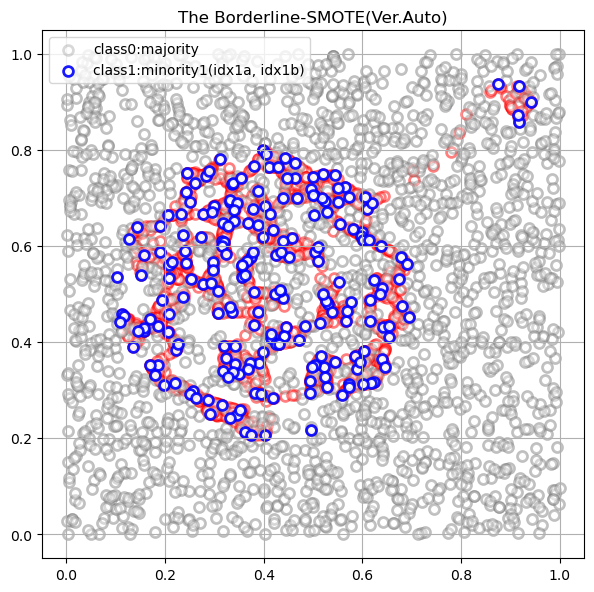

In [54]:
# オーバーサンプリング後(auto版)

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.3)
        
    # 少数派クラス1(idx1a(集合大), idx1b(集合小))
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
        
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.3, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE(Ver.Auto)')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()

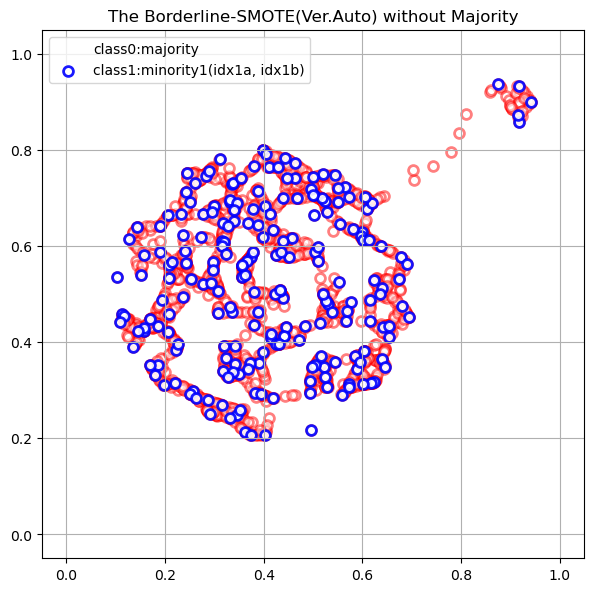

In [55]:
# オーバーサンプリング後(auto & 多数派クラス非表示版)

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.0)
        
    # 少数派クラス1(idx1a(集合大), idx1b(集合小))
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
        
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.0, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE(Ver.Auto) without Majority')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()

## sampling_strategy='minority' 版 (Borderline-2)

In [56]:
# BorderlineSMOTE2(Ver.minority)

sm_minority = BorderlineSMOTE(sampling_strategy='minority',\
                              random_state=None,\
                              k_neighbors=5,\
                              n_jobs=None,\
                              m_neighbors=10,\
                              kind='borderline-2')

X_res, y_res = sm_minority.fit_resample(X, y)


In [57]:
# 目的変数の割合確認
from collections import Counter
print(sorted(Counter(y_res).items()))

[(0, 2123), (1, 2122)]


In [58]:
# 明示的に一次配列y_res(Row_max, 1)の形に再定義する。
y_res = np.reshape(y_res, (-1, 1))

# 目的変数の値を条件式に利用してプロット図を
# 描画するため説明変数(X軸,Y軸)と目的変数を結合
resample_dataset = np.hstack((X_res, y_res))


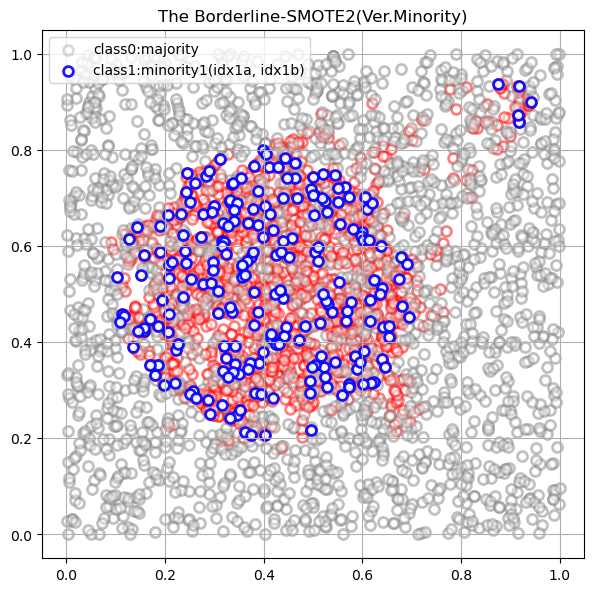

In [59]:
# オーバーサンプリング後(minority版) Borderline-SMOTE2

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.3)
        
    # 少数派クラス1(idx1a(集合大), idx1b(集合小))
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
             
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.3, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE2(Ver.Minority)')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()

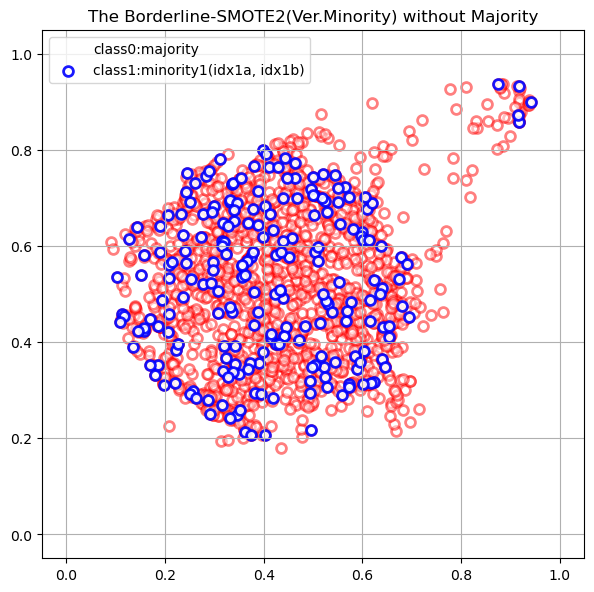

In [60]:
# オーバーサンプリング後(minority & 多数派クラス非表示版) Borderline-SMOTE2

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.0)
        
    # 少数派クラス1(idx1a(集合大), idx1b(集合小))
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
        
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.0, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE2(Ver.Minority) without Majority')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()

## sampling_strategy='auto' 版 (Borderline-2)

In [61]:
# BorderlineSMOTE-2(Ver.auto)

sm_auto = BorderlineSMOTE(sampling_strategy='auto',\
                          random_state=None,\
                          k_neighbors=5,\
                          n_jobs=None,\
                          m_neighbors=10,\
                          kind='borderline-2')

X_res, y_res = sm_auto.fit_resample(X, y)


In [62]:
# 目的変数の割合
from collections import Counter
print(sorted(Counter(y_res).items()))

[(0, 2123), (1, 2123)]


In [63]:
# 明示的に一次配列y_res(Row_max, 1)の形に再定義する。
y_res = np.reshape(y_res, (-1, 1))

# 目的変数の値を条件式に利用してプロット図を
# 描画するため説明変数(X軸,Y軸)と目的変数を結合
resample_dataset = np.hstack((X_res, y_res))

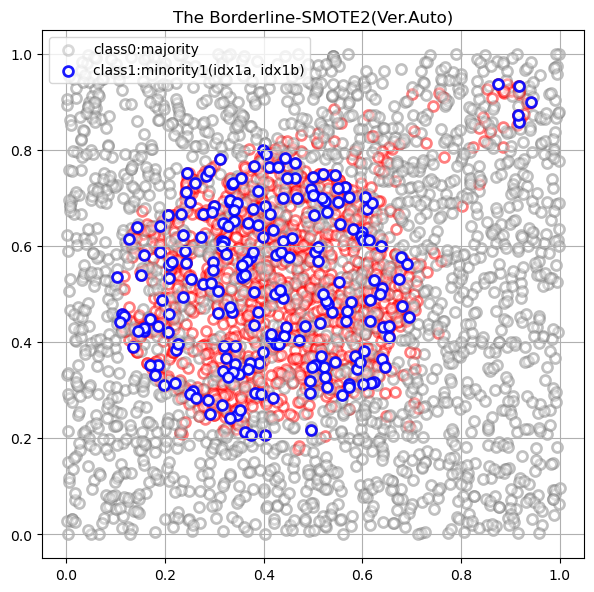

In [64]:
# オーバーサンプリング後(auto版) Borderline-SMOTE2

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.3)
        
    # 少数派クラス1(idx1a(集合大), idx1b(集合小))
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
        
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.3, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE2(Ver.Auto)')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()

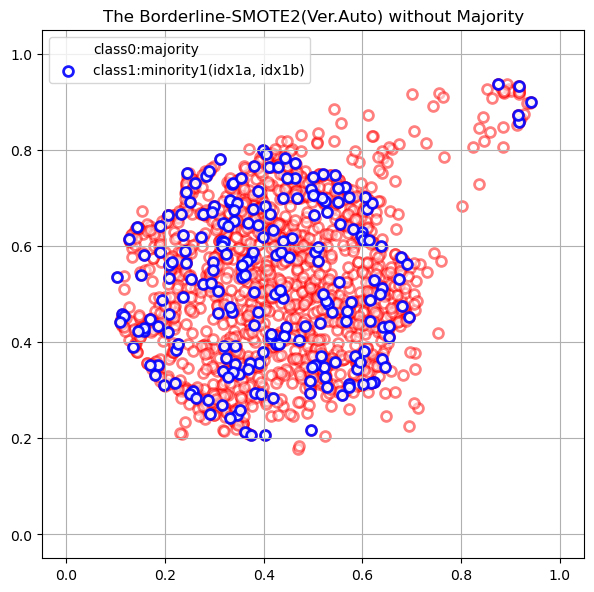

In [65]:
# オーバーサンプリング後(auto & 多数派クラス非表示版) Borderline-SMOTE2

# プロット描画領域の設定
plt.figure(figsize=(7,7), dpi=100)

# プロット描画(リサンプル後)
for rs_element in resample_dataset:

    # 多数派クラス
    if int(rs_element[2]) == 0:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray', alpha=0.0)
        
    # 少数派クラス1(idx1a, idx1b)
    elif int(rs_element[2]) == 1:
        plt.scatter(float(rs_element[0]), float(rs_element[1]), c='white', marker='o', s=50, linewidths=2.0, edgecolors='red',  alpha=0.5)
        
    # 例外処理
    else:
        pass

# オリジナルデータ(初期データセット)を重ねてプロット
plt.scatter( data[:, 0],  data[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='gray',  alpha=0.0, label='class0:majority')
plt.scatter(data1[:, 0], data1[:, 1], c='white', marker='o', s=50, linewidths=2.0, edgecolors='blue',  alpha=0.9, label='class1:minority1(idx1a, idx1b)')

# プロット図タイトル
plt.title('The Borderline-SMOTE2(Ver.Auto) without Majority')

# 凡例表示
plt.legend(loc='upper left')

# グリッド線表示
plt.grid()

plt.show()